---
title: "Numpy functions in atomic scale"
date: "2025-12-24"
categories: [Python 3, Jupyter Notebook, SciPy, Numpy, Matplotlib, Physics]
---

# More Numpy functions in Atomic Scale

This work is a short reference for some useful functionality of Numpy to study molecular dynamics of phonon eletron interfaces energy transport. The presentation on Numpy, SciPy, and Matplotlib will follow this sections:

1. Numpy provides a number of sub-packages for representing and manipulating data, the`numpy.polynomial.polynomial` class is basis function and commonly use in Numpy Polynomial.
2. Scientific Python (SciPy). The package, `scipy.constants` provides the numerical values of many pf the constants used in physics and chemistry. The more common ones, in SI units, can be import directly.

Physical constants that can be directly imported from scipy.constants in SI units
<div style="width:60%; margin:auto;">
    
|symbol   | values                          | SI (units)                          |
|:-------|-------------------------------|:-----------------------------------|
| c       | 299792458.0                     | speed of light in vacuum, m s−1     |
|epsilon_0| 8.8541878128e-12                | vacuum permittivity, 	 0,Fm−1       |
|h        | 6.62607015e-34                  | Planck constant , h,Js              |
|hbar     | 1.0545718176461565e-34          | h¯ = h/(2π ),Js                     |
|e        | 1.602176634e-19                 | elementary charge, C                |               
|R        | 8.314462618                     | molar gas constant, J K−1 mol−1     |
|N_A      | 6.02214076e+23                  | Avogadro constant, mol−1            |
|k        | 1.380649e-23                    | Boltzmann constant, J K−1           |
|Rydberg  | 10973731.56816                  | Rydberg constant, m−1               |
|m_e      | 9.1093837015e-31                | electron mass, kg                   |
|m_p      | 1.67262192369e-27               | proton mass, kg                     |
|m_n      |1.67492749804e-27                | neutron mass, kg                    |

</div>  


# P9.1 -  Case Study: A Quartic Polynomial and Lennard-Jones Potential
No one should have the impression that people who do molecular simulation only care about the Lennard-Jone fluid. It has been and continues to be important test-bed for theories of the liquid srate and phase-eqilibria. 

## Prior knowledge
- Basics on thermodynamics and statistical mechanics
- Basics on coarse-grained simulation methods: molecular dynamics and Langevin dynamics
- Correlation functions
- Pair structure and radial distribution function.

## The Lennard-Jones Potential
The Lennard-Jones potential (also referred to as the LJ potential, 6-12 potential or, less commonly, 12-6 potential) is a simple mathematical model that represents this behavior. It was proposed in 1924 by John Lennard-Jones. The LJ potential is of the form

$V(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]$

Where $\epsilon$ is the depth of the potential well, providing a measure of the attraction strength, $\sigma$ is the (finite) distance at which the inter-particle potential is zero and $r$ is the distance between the particle. The $(\frac{1}{r})^{12}$ term describes repulsion and the $(\frac{1}{r})^{6}$ term describes attraction.

The Lennard-Jones potential is an approximation. The form of the repulsion term has no theoritical justification, the repulsion force should depend exponentially on the distance, but the nverse poser form the repusion term of the LJ formula is more convenient due to the ease and efficiency of compiting $r^{12}$ as the square of $r^{6}$.

Insimulation, the LJ potential is typically cut off beyond a specified distance $r_{cut}$, i.e. the potential is zero for distance larger than the cutoff distance. Also an additional potential shif $c_{shift}$ can be addeed.
- $v(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]+c_{shift}$, where $0 \leq r \leq r_{cut}$

- $v(r)= 0$, where   $r < r_{cut}$


For example, suppose you wish to fit a quartic polynomial to the Lennard-Jones potential of Xe. Where $\epsilon=1.77$ k$J mol^{-1}$, and $\sigma=4.1$ $\mathring{A}$. The interesting region of this function is around $4.2\leq r \leq 5.5$ $\mathring{A}$. 

$V(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]=\frac{A}{r^{12}}-\frac{B}{r^{6}}$

## The key arguments:
- `numpy.polynomial.polynomial`:
- `pfit`: generate values of the fitted polynomial
- `convert()`: return the coefficients of polynomial $(x'=\mu + x)$
- `numpy.polyfit`: performs the fit directly

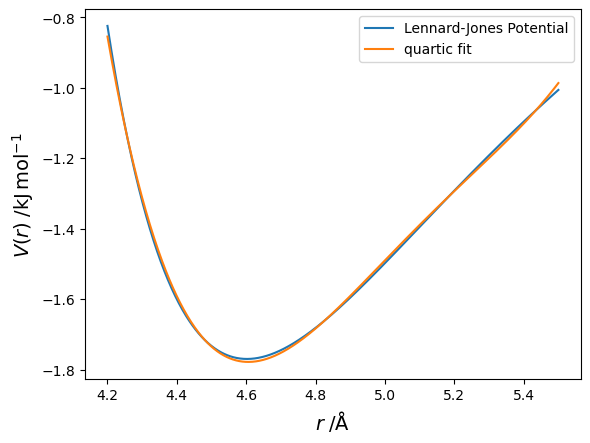

1543.92526335 - 1212.86206256 x + 356.15664798 x**2 - 46.41324243 x**3 +
2.26661429 x**4
Polyfit coefficients: [    2.26661429   -46.41324243   356.15664798 -1212.86206256
  1543.92526334]
Polynomial.fit conefficients: [ 1543.92526335 -1212.86206256   356.15664798   -46.41324243
     2.26661429]


In [33]:
import numpy as np
from numpy.polynomial import Polynomial as P
import matplotlib.pyplot as plt
import math as m

# Parameters
epsilon, sigma = 1.77, 4.1 # epsilon in kJ mol-1 and sigma in Angstrong
A, B, = 4 * epsilon * sigma** 12, 4 * epsilon * sigma**6

# calculate Lennard-Jones Potential 
def V(r):
    return A / r**12 - B / r**6

# Use argument Numpy Polynomial
r = np.linspace(4.2, 5.5, 1000)
pfit = P.fit(r, V(r), 4).convert() # convert to power basis

# Create The Lennard-Jones potential and te quartic fit
plt.plot(r, V(r), label='Lennard-Jones Potential')
plt.plot(r, pfit(r), label='quartic fit')
plt.xlabel(r'$r\;/\mathrm{\AA}$', fontsize=14) 
plt.ylabel(r'$V(r)\;/\mathrm{kJ\,mol^{-1}}$', fontsize=14)
plt.legend()
plt.show()

# compare with legacy function numpy.polyfit
coefficients = np.polyfit(r, V(r), 4)
print('Polyfit coefficients:', coefficients)
print('Polynomial.fit conefficients:', pfit.coef)


# P9.2 Case study: Physical Constants (SciPy)
SciPy is an open-source for mathematic, science, and engineering. SciPy is built to work with NumPy arrays, and provide manu user-friendly and efficient. NumPy and SciPy is powerful enough to be depended upon by some of the world's leading scientist and engineers.

## Installation
- `pip install scipy`
- `conda install anaconda::scipy`

## Key arguments
- `scipy.constants`: complete data base constant
- `scipy.constants.physical`: provides dictionary in the format `(value, unit, uncertainty)`.

reference:
[CODATA 2018](https://physics.nist.gov/cuu/pdf/wall_2018.pdf)

In [39]:
# import massa electron and proton
from scipy.constants import m_e, m_p
print('massa electron:', m_e)
print('massa proton:', m_p)

# import form dictionary
import scipy.constants as pc
planck_constant = pc.physical_constants['Planck constant']
print('Planck Constant:', planck_constant)

nano = pc.nano
print('SI nano:', nano)


massa electron: 9.1093837139e-31
massa proton: 1.67262192595e-27
Planck Constant: (6.62607015e-34, 'J Hz^-1', 0.0)
SI nano: 1e-09
